In [301]:
from bs4 import BeautifulSoup as Soup #decode
import numpy as np #np.nan
import requests
import time #for time delay
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload
import copy
import re
import Carscraper8891 as scrap

In [411]:
#Database
df_car = pd.read_csv("./df_car_info.csv")


In [417]:
reload(scrap)
car_scaper = scrap.CarScraper(df_car)

init


In [404]:
saling_id = car_scaper.scrape_all_id(30,270,'div','text-box')

scraping 2 / 9 page
scraping 3 / 9 page
scraping 4 / 9 page
scraping 5 / 9 page
scraping 6 / 9 page
scraping 7 / 9 page
scraping 8 / 9 page
This ID has already scraped
Done


In [405]:
len(saling_id)

205

In [408]:
link_all_soup = car_scaper.get_all_soup(saling_id)

scraping 1 / 205 links soup
scraping 2 / 205 links soup
scraping 3 / 205 links soup
scraping 4 / 205 links soup
scraping 5 / 205 links soup
scraping 6 / 205 links soup
scraping 7 / 205 links soup
scraping 8 / 205 links soup
scraping 9 / 205 links soup
scraping 10 / 205 links soup
scraping 11 / 205 links soup
scraping 12 / 205 links soup
scraping 13 / 205 links soup
scraping 14 / 205 links soup
scraping 15 / 205 links soup
scraping 16 / 205 links soup
scraping 17 / 205 links soup
scraping 18 / 205 links soup
scraping 19 / 205 links soup
scraping 20 / 205 links soup
scraping 21 / 205 links soup
scraping 22 / 205 links soup
scraping 23 / 205 links soup
scraping 24 / 205 links soup
scraping 25 / 205 links soup
scraping 26 / 205 links soup
scraping 27 / 205 links soup
scraping 28 / 205 links soup
scraping 29 / 205 links soup
scraping 30 / 205 links soup
scraping 31 / 205 links soup
scraping 32 / 205 links soup
scraping 33 / 205 links soup
scraping 34 / 205 links soup
scraping 35 / 205 links

In [418]:
reload(scrap)
car_info = []
no_info = []
for soup in link_all_soup :
    try:
        car_info.append(car_scaper.extract_car_info(soup))
    except:
        no_info.append(soup)

In [419]:
df_car2 = pd.DataFrame(car_info)
df_car2

,car_id,Name,Color,used year,gas,mileage,Outfit,detail,price
0,3728262,光陽/KYMCO - V2,藍色,2014,0.1L,5.6,原漆 土除,Hello~我們是笛加車業 LINE ID ：@djcar 找車問笛加(DJ-...,23000.0
1,3741119,三陽/SYM - Fiddle 125,,2020,0.1L,2,原漆 土除 ABS 液晶面板,Hello~我們是笛加車業 LINE ID ：@djcar 找車問笛加(DJ-...,55000.0
2,3741120,三陽/SYM - 迪爵 125,藍色,2019,0.1L,3.03,原漆 土除,Hello~我們是笛加車業 LINE ID ：@djcar 找車問笛加(DJ-...,37000.0
3,3747421,山葉/Yamaha - CUXI 100,紅色,2010,0.1L,1.71,原漆,Hello~我們是笛加車業 LINE ID ：@djcar 找車問笛加(DJ-...,25000.0
4,3755169,三陽/SYM - 迪爵 125,藍色,2019,0.1L,3.03,原漆 土除,Hello~我們是笛加車業 LINE ID ：@djcar 找車問笛加(DJ-...,34000.0
...,...,...,...,...,...,...,...,...,...
199,3726559,山葉/Yamaha - BWS,白色,2013,0.1L,2.2,原漆 外觀改裝,因家中已有多部重機車，故求售( 亦可換小台的機車),22000.0
200,3726512,BMW - Rnine T,白色,2019,1.2L,1200,原漆 土除 皮椅 ABS 鋁合金鋼圈,BMW R NINET PURE 2019.01出廠2019.07.30. 掛...,588000.0
201,3726453,BMW - Rnine T,白色,2019,1.2L,1200,原漆 土除 皮椅 ABS 鋁合金鋼圈,BMW R NINET PURE 2019.01出廠2019.07.30. 掛...,588000.0
202,3726402,本田/HONDA - Forza 300,銀色,2018,0.3L,4.73,土除 皮椅 ABS 中控鎖 液晶面板 行車電腦 駐車架 液晶儀錶 晶片鑰匙 後車箱 鋁合金鋼...,【杰運機車】2018 Honda Forza 300 ABS 水冷單缸 Ke...,NaN


In [423]:
df_car_info = df_car2

df_car_info[['Company', 'Model']] = df_car_info['Name'].replace(' ','').str.split('-', n=1, expand=True)
df_car_info = df_car_info.drop(columns='Name')
df_car_info.insert(1, 'Company', df_car_info.pop('Company'))
df_car_info.insert(2, 'Model', df_car_info.pop('Model'))

df_car_info['Company'] = df_car_info['Company'].str.replace(' ','').replace('','other')
df_car_info['Model'] = df_car_info['Model'].replace(' ','other')

df_car_info['mileage'] = pd.to_numeric(df_car_info['mileage'],errors='coerce')
df_car_info['mileage'] = df_car_info['mileage'].apply(lambda x: x * 10000 if x < 100 else x)
df_car_info['mileage']= pd.to_numeric(df_car_info['mileage'], errors='coerce')

df_car_info['Color'] = df_car_info["Color"].replace('','其他')
df_car_info['Color'] = df_car_info["Color"].replace('其他()','其他')

df_car_info['gas'] = df_car_info["gas"].str.replace('L','')
df_car_info['gas'] = df_car_info["gas"].str.replace('以上','')
df_car_info['gas'] = df_car_info["gas"].str.replace('以下','')
df_car_info['gas'] = df_car_info["gas"].str.replace('-','')
df_car_info['gas'] = pd.to_numeric(df_car_info['gas'], errors='coerce')

df_car_info['used year'] = pd.to_numeric(df_car_info['used year'], errors='coerce')
this_year = 2024
df_car_info['used year'] = this_year - df_car_info['used year']
df_car_info['used year'] = df_car_info['used year'].apply(lambda x: 0 if x == 2024 else x )

df_car_info['detail'] = df_car_info["detail"].str.replace('-','')

In [425]:
df_car_info

,car_id,Company,Model,Color,used year,gas,mileage,Outfit,detail,price
0,3728262,光陽/KYMCO,V2,藍色,10,0.1,56000.0,原漆 土除,Hello~我們是笛加車業 LINE ID ：@djcar 找車問笛加(DJc...,23000.0
1,3741119,三陽/SYM,Fiddle 125,其他,4,0.1,20000.0,原漆 土除 ABS 液晶面板,Hello~我們是笛加車業 LINE ID ：@djcar 找車問笛加(DJc...,55000.0
2,3741120,三陽/SYM,迪爵 125,藍色,5,0.1,30300.0,原漆 土除,Hello~我們是笛加車業 LINE ID ：@djcar 找車問笛加(DJc...,37000.0
3,3747421,山葉/Yamaha,CUXI 100,紅色,14,0.1,17100.0,原漆,Hello~我們是笛加車業 LINE ID ：@djcar 找車問笛加(DJc...,25000.0
4,3755169,三陽/SYM,迪爵 125,藍色,5,0.1,30300.0,原漆 土除,Hello~我們是笛加車業 LINE ID ：@djcar 找車問笛加(DJc...,34000.0
...,...,...,...,...,...,...,...,...,...,...
199,3726559,山葉/Yamaha,BWS,白色,11,0.1,22000.0,原漆 外觀改裝,因家中已有多部重機車，故求售( 亦可換小台的機車),22000.0
200,3726512,BMW,Rnine T,白色,5,1.2,1200.0,原漆 土除 皮椅 ABS 鋁合金鋼圈,BMW R NINET PURE 2019.01出廠2019.07.30. 掛...,588000.0
201,3726453,BMW,Rnine T,白色,5,1.2,1200.0,原漆 土除 皮椅 ABS 鋁合金鋼圈,BMW R NINET PURE 2019.01出廠2019.07.30. 掛...,588000.0
202,3726402,本田/HONDA,Forza 300,銀色,6,0.3,47300.0,土除 皮椅 ABS 中控鎖 液晶面板 行車電腦 駐車架 液晶儀錶 晶片鑰匙 後車箱 鋁合金鋼...,【杰運機車】2018 Honda Forza 300 ABS 水冷單缸 Ke...,NaN


In [426]:
new_df_car_info = pd.concat([df_car, df_car_info], axis = 0 ,ignore_index= True)
new_df_car_info

,car_id,Company,Model,Color,used year,gas,mileage,Outfit,detail,price
0,3655422,比雅久/PGO,Alpha Max 125,綠色,5,0.1,12900.0,原漆土除液晶面板液晶儀錶,Hello~我們是笛加車業LINEID：@djcar找車問笛加(DJ-car)：幫您找五年內...,36000.0
1,3667258,三陽/SYM,迪爵 125,灰色,4,0.1,32100.0,原漆土除液晶面板,Hello~我們是笛加車業LINEID：@djcar找車問笛加(DJ-car)：幫您找五年內...,40000.0
2,3683117,三陽/SYM,迪爵 125,藍色,4,0.1,30300.0,原漆土除,Hello~我們是笛加車業LINEID：@djcar找車問笛加(DJ-car)：幫您找五年內...,35000.0
3,3683119,山葉/Yamaha,GTR AERO,白色,11,0.1,24100.0,原漆土除液晶面板,Hello~我們是笛加車業LINEID：@djcar找車問笛加(DJ-car)：幫您找五年內...,26000.0
4,3685029,山葉/Yamaha,勁豪125/AXIS Z,黑色,3,0.1,18000.0,原漆土除,Hello~我們是笛加車業LINEID：@djcar找車問笛加(DJ-car)：幫您找五年內...,41000.0
...,...,...,...,...,...,...,...,...,...,...
7182,3726559,山葉/Yamaha,BWS,白色,11,0.1,22000.0,原漆 外觀改裝,因家中已有多部重機車，故求售( 亦可換小台的機車),22000.0
7183,3726512,BMW,Rnine T,白色,5,1.2,1200.0,原漆 土除 皮椅 ABS 鋁合金鋼圈,BMW R NINET PURE 2019.01出廠2019.07.30. 掛...,588000.0
7184,3726453,BMW,Rnine T,白色,5,1.2,1200.0,原漆 土除 皮椅 ABS 鋁合金鋼圈,BMW R NINET PURE 2019.01出廠2019.07.30. 掛...,588000.0
7185,3726402,本田/HONDA,Forza 300,銀色,6,0.3,47300.0,土除 皮椅 ABS 中控鎖 液晶面板 行車電腦 駐車架 液晶儀錶 晶片鑰匙 後車箱 鋁合金鋼...,【杰運機車】2018 Honda Forza 300 ABS 水冷單缸 Ke...,NaN


In [427]:
new_df_car_info.to_csv('./df_car_info.csv',index=False)

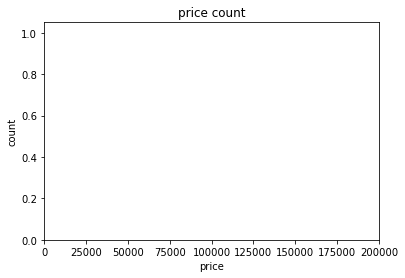

In [253]:
plt.Figure(figsize=(15,6))
plt.hist(df_car_info['price'],bins = 1000, color = 'skyblue')
plt.xlim(0,200000)
plt.xlabel('price')
plt.ylabel('count')
plt.title('price count')
plt.show()

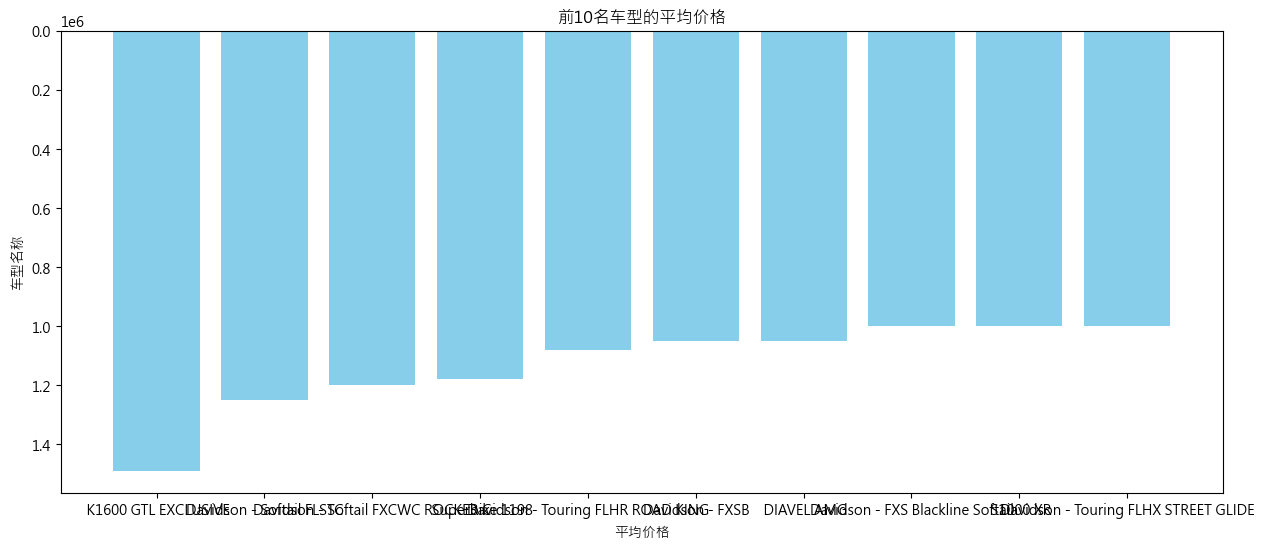

In [504]:
# 统计每个名字对应的平均价格
name_price_mean = df_car_info.groupby('Model')['price'].mean().reset_index()

# 排序数据，按平均价格降序排列
name_price_mean = name_price_mean.sort_values(by='price', ascending=False)

# 取前 10 个名字和价格
top_10_names = name_price_mean.head(10)

# 绘制统计图
plt.rc('font', family='Microsoft JhengHei')
plt.figure(figsize=(15, 6))
plt.bar(top_10_names['Model'], top_10_names['price'], color='skyblue')
plt.xlabel('平均价格')
plt.ylabel('车型名称')
plt.title('前10名车型的平均价格')
plt.gca().invert_yaxis()  # 翻转 y 轴，使价格高的显示在顶部
plt.show()

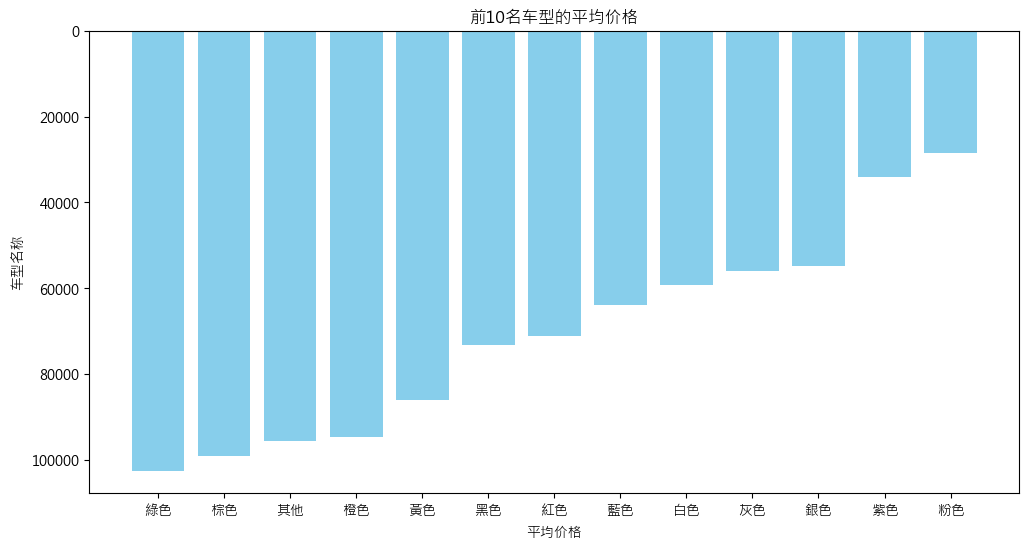

In [461]:
# 统计每个名字对应的平均价格
color_price_mean = df_car_info.groupby('Color')['price'].mean().reset_index()

# 排序数据，按平均价格降序排列
color_price_mean = color_price_mean.sort_values(by='price', ascending=False)

# 取前 10 个名字和价格
top_10_color = color_price_mean

# 绘制统计图
plt.figure(figsize=(12, 6))
plt.bar(top_10_color['Color'], top_10_color['price'], color='skyblue')
plt.xlabel('平均价格')
plt.ylabel('车型名称')
plt.title('前10名车型的平均价格')
plt.gca().invert_yaxis()  # 翻转 y 轴，使价格高的显示在顶部
plt.show()

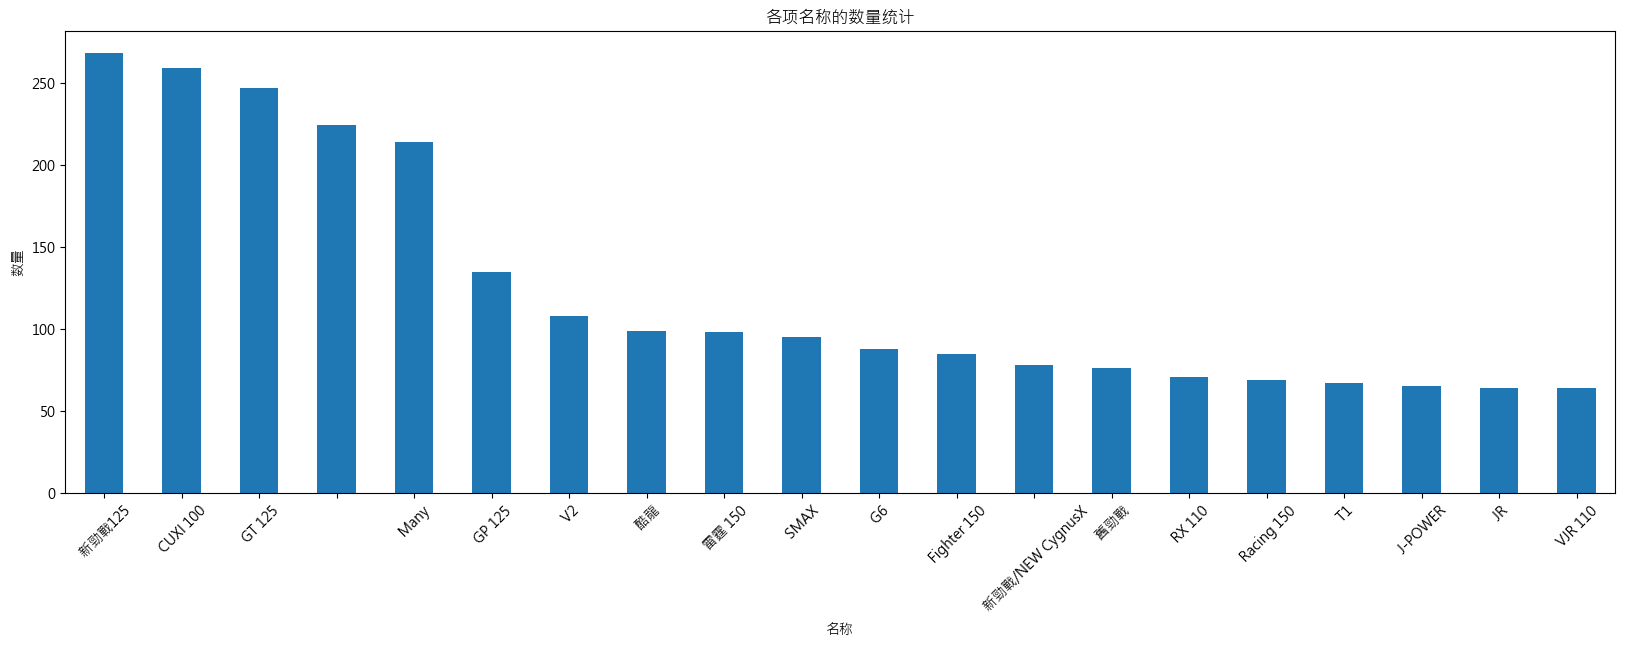

In [464]:
name_counts = df_car_info['Model'].value_counts().head(20)

plt.rc('font', family='Microsoft JhengHei')
plt.figure(figsize=(20, 6))
name_counts.plot(kind='bar')
plt.xlabel('名称')
plt.ylabel('数量')
plt.title('各项名称的数量统计')
plt.xticks(rotation=45)
plt.show()

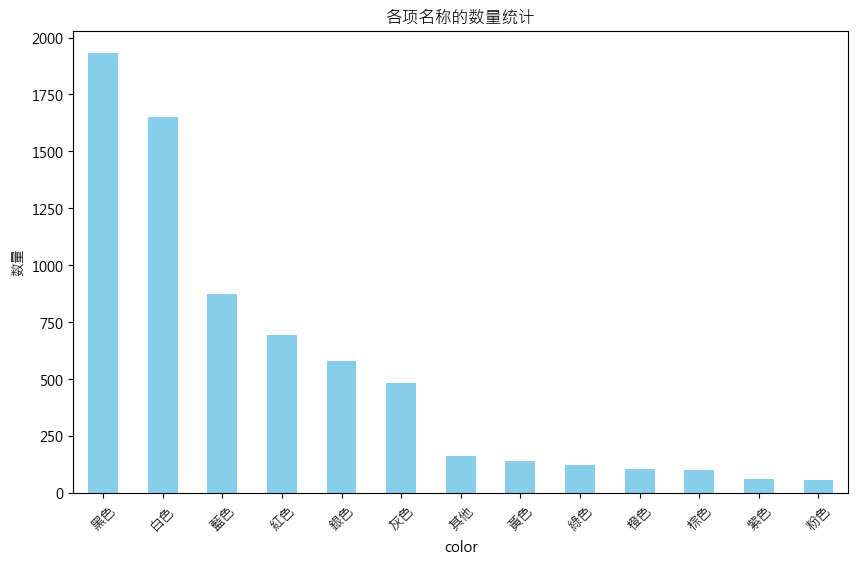

In [465]:
color_counts = df_car_info['Color'].value_counts()

plt.rc('font', family='Microsoft JhengHei')
plt.figure(figsize=(10, 6))
color_counts.plot(kind='bar', color='skyblue')
plt.xlabel('color')
plt.ylabel('数量')
plt.title('各项名称的数量统计')
plt.xticks(rotation=45)
plt.show()